In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from scipy.stats import stats
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

# Soru 1:
Does the performance in the exams vary according to gender, origin and education level of parents?

In [5]:
df=pd.read_csv("StudentsPerformance.csv", index_col=0).reset_index()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


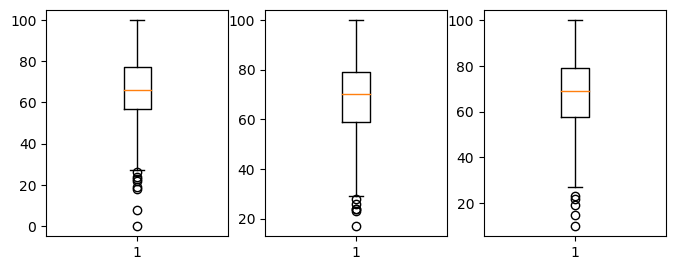

In [41]:
variable=["math score","reading score","writing score"]

plt.figure(figsize=(8,3),dpi=100)

for i in range(len(variable)):
    plt.subplot(1,3,i+1)
    plt.boxplot(df[variable[i]])
plt.show() 

#outliers değerlerden kurtulmak için winsorize edelim:
# Ancak winsorize etmemize ve ardından log almamıza rağmen outliers değerlerden kurtulamadık, değişkenler sınav sonuçları olduğu için
# uç değerlerin (max 100 gibi) normal olduğundan outliers ları kaldırmadan sürece devam edebiliriz.

Sınav sonuçlarının ebeveyn bilgilerine göre değişip değişmediğinin analizini yaparken, kategorik-sürekli değişken analizini incelemeliyiz. Yani bar plot ile çizdirdiğimiz görselleri istatistiksel olarak kanıtlamak için t-testi yapabiliriz.

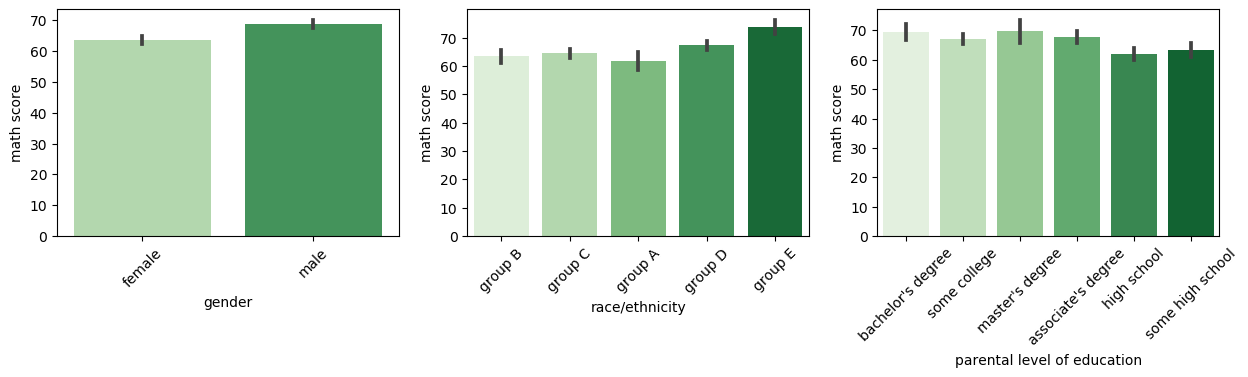

In [55]:
# Kategorik değişken ile sürekli değişken arasındaki ilişkinin grafiği için,barplot çizdirilebilir. 
plt.figure(figsize=(15,3),dpi=100)

# math' e göre;
plt.subplot(1,3,1)
sns.barplot(df["gender"],df["math score"], palette='Greens')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.barplot(df["race/ethnicity"],df["math score"], palette='Greens')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.barplot(df["parental level of education"],df["math score"], palette='Greens')
plt.xticks(rotation=45)

plt.show()

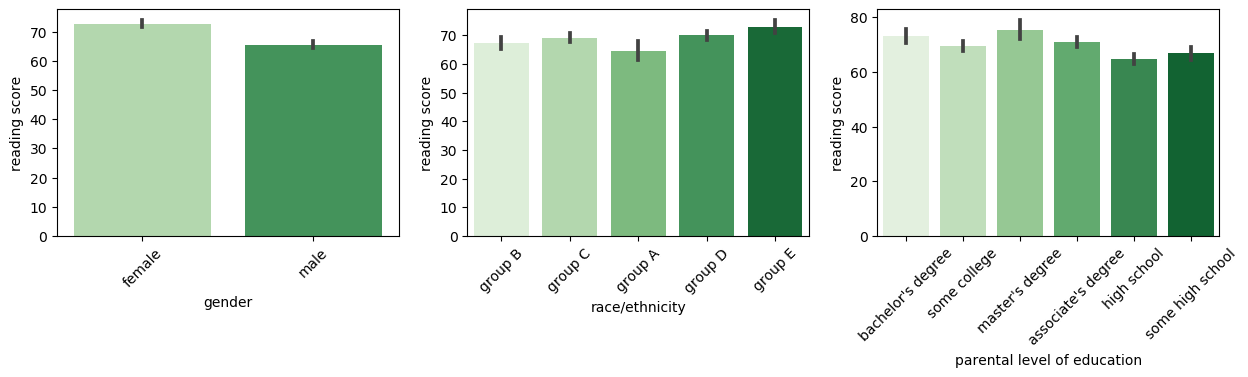

In [56]:
# Reading'e göre;
plt.figure(figsize=(15,3),dpi=100)

plt.subplot(1,3,1)
sns.barplot(df["gender"],df["reading score"], palette='Greens')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.barplot(df["race/ethnicity"],df["reading score"], palette='Greens')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.barplot(df["parental level of education"],df["reading score"], palette='Greens')
plt.xticks(rotation=45);

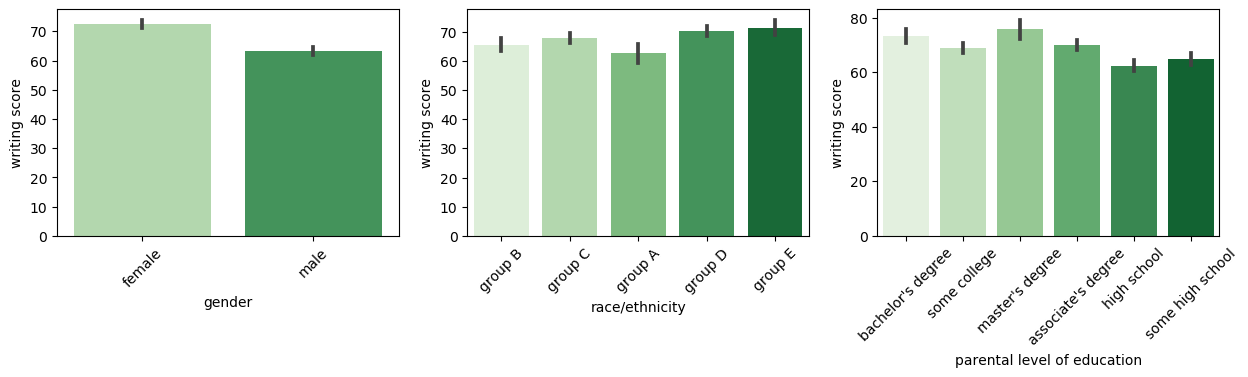

In [57]:
# writing'e göre;
plt.figure(figsize=(15,3),dpi=100)

plt.subplot(1,3,1)
sns.barplot(df["gender"],df["writing score"], palette='Greens')
plt.xticks(rotation=45);

plt.subplot(1,3,2)
plt.xticks(rotation=45);
sns.barplot(df["race/ethnicity"],df["writing score"], palette='Greens')

plt.subplot(1,3,3)
sns.barplot(df["parental level of education"],df["writing score"], palette='Greens')
plt.xticks(rotation=45);

In [73]:
# Veli cinsiyetine göre sınav sonuçları arasındaki lişkinin t-testi:

df_gender=df["gender"].unique()

for var in ["math score","reading score","writing score"]:
    comparison=pd.DataFrame(columns=["gender_1","gender_2","statistic","p_value"])
    for i in range(0,len(df_gender)):
        for j in range(i+1,len(df_gender)):
            ttest=stats.ttest_ind(df[df["gender"]==df_gender[i]][var],
                                 df[df["gender"]==df_gender[j]][var])
            comparison=comparison.append({"gender_1":df_gender[i],
                                         "gender_2":df_gender[j],
                                         "statistic":ttest[0],
                                         "p_value":ttest[1]}, ignore_index=True)
    display(comparison)           

# p<0.05 olduğu için, velinin cinsiyetine göre matematik, okuma ve yazma sınav sonuçları arasında bir ilişki bulunmamaktadır.

,gender_1,gender_2,statistic,p_value
0,female,male,-5.383246,9.120186e-08


,gender_1,gender_2,statistic,p_value
0,female,male,7.959308,4.680539e-15


,gender_1,gender_2,statistic,p_value
0,female,male,9.979558,2.019878e-22


In [71]:
df_origin=df["race/ethnicity"].unique()

for var in ["math score","reading score","writing score"]:
    comparison=pd.DataFrame(columns=["origin_1","origin_2","statistic","p_value"])
    for i in range(0,len(df_origin)):
        for j in range(i+1,len(df_origin)):
            ttest=stats.ttest_ind(df[df["race/ethnicity"]==df_origin[i]][var],
                                 df[df["race/ethnicity"]==df_origin[j]][var])
            comparison=comparison.append({"origin_1":df_origin[i],
                                         "origin_2":df_origin[j],
                                         "statistic":ttest[0],
                                         "p_value":ttest[1]}, ignore_index=True)
    display(comparison) 
    
# math skoru için origine göre p<0.05 olduğu için ilişki yoktur denilir.
# reading score için origine göre p<0.05 olduğu için hiçbir grup ile ilişkide değildir
# writing scoru için origine göre p<0.05  olduğu için hiçbir grupla ilişkide değildir.

,origin_1,origin_2,statistic,p_value
0,group B,group C,-0.731567,4.647709e-01
1,group B,group A,0.935508,3.503416e-01
2,group B,group D,-2.828455,4.886197e-03
3,group B,group E,-6.007397,5.007946e-09
4,group C,group A,1.599722,1.104381e-01
5,group C,group D,-2.418586,1.588835e-02
6,group C,group E,-6.127643,1.927239e-09
7,group A,group D,-3.346698,9.068636e-04
8,group A,group E,-5.936141,1.083559e-08
9,group D,group E,-4.282287,2.318764e-05


,origin_1,origin_2,statistic,p_value
0,group B,group C,-1.322316,0.186659
1,group B,group A,1.363368,0.173874
2,group B,group D,-1.945156,0.052379
3,group B,group E,-3.386067,0.000795
4,group C,group A,2.575432,0.010364
5,group C,group D,-0.797011,0.425771
6,group C,group E,-2.713302,0.006913
7,group A,group D,-3.046855,0.002489
8,group A,group E,-4.071106,0.000065
9,group D,group E,-2.010648,0.045033


,origin_1,origin_2,statistic,p_value
0,group B,group C,-1.596496,0.111001
1,group B,group A,1.462442,0.144754
2,group B,group D,-3.199293,0.001475
3,group B,group E,-3.383198,0.000803
4,group C,group A,2.848872,0.004611
5,group C,group D,-1.889663,0.059302
6,group C,group E,-2.350281,0.019184
7,group A,group D,-4.155632,0.000041
8,group A,group E,-4.223474,0.000035
9,group D,group E,-0.823974,0.410446


# Soru 2:
Does lunch type have a relationship with exam performances? How can you explain this, if any?

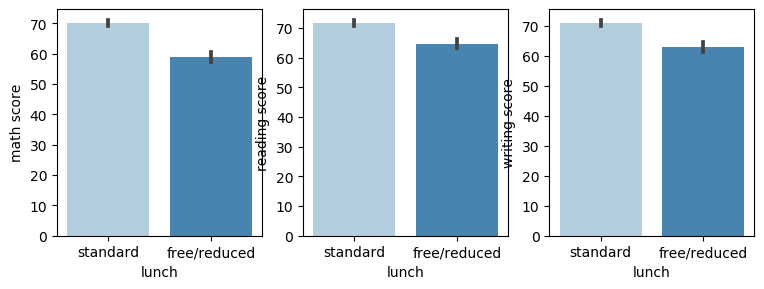

math score için t-testi

,group_1,group_2,statistic,p_value
0,standard,free/reduced,11.8371804729,0.0000000000


reading score için t-testi

,group_1,group_2,statistic,p_value
0,standard,free/reduced,7.4510564675,0.0000000000


writing score için t-testi

,group_1,group_2,statistic,p_value
0,standard,free/reduced,8.0097841978,0.0000000000


In [75]:
# Lunch ile score'lar arasındaki ilişki, kategorik ve sürekli değişkenler analizi ile bulunabilir
# ttesti ile aradaki ilişki araştırılabilir.Önce barplot ile görselleştirelim:
df=pd.read_csv("StudentsPerformance.csv", index_col=0).reset_index()
plt.figure(figsize=(9,3),dpi=100)

plt.subplot(1,3,1)
sns.barplot(df["lunch"],df["math score"], palette='Blues')

plt.subplot(1,3,2)
sns.barplot(df["lunch"],df["reading score"], palette='Blues')

plt.subplot(1,3,3)
sns.barplot(df["lunch"],df["writing score"], palette='Blues')
plt.show()


# T TESTİ;

# HA = lunch değişkeni ile sınavlar arasında fark vardır (p<0.05)
# H0 = lunch değişkeni ile sınavlar arasında fark yoktur (p>0.05)

df.dropna(inplace=True)

lunch=df["lunch"].unique()
group_lunch=df.groupby("lunch")

pd.options.display.float_format='{:.10f}'.format

for var in ["math score","reading score","writing score"]:
    comparison=pd.DataFrame(columns=["group_1","group_2","statistic","p_value"])
    print("{} için t-testi". format(var), end='')
    for i in range(0,len(lunch)):
        for j in range(i+1,len(lunch)):
            ttest=stats.ttest_ind(df[df["lunch"]==lunch[i]][var],
                                 df[df["lunch"]==lunch[j]][var])
            group_1=lunch[i]
            group_2=lunch[j]
            statistic=ttest[0]
            p_value=ttest[1]
            
            comparison=comparison.append({"group_1":group_1,
                                         "group_2":group_2,
                                         "statistic":statistic,
                                         "p_value":p_value}, ignore_index=True)
    display(comparison)       

# lunch kategorik değişkeninin her 3 sürekli değişken ile ilişkili olup olmadığı
# p_value değeri ile anlaşılmaktadır. p<0.05 den küçük olduğu için HA alternatifi kabul edilir yani
# aralarında ilişki yoktur denilir.

# Soru 3:
Does the preparation courses have an impact on exam performance?

math score için t testi

,group_1,group_2,statistic,p_value
0,none,completed,-5.704616417349102,0.000000015359135


reading score için t testi

,group_1,group_2,statistic,p_value
0,none,completed,-7.871663538941468,0.000000000000009


writing score için t testi

,group_1,group_2,statistic,p_value
0,none,completed,-10.409173436808748,0.000000000000000


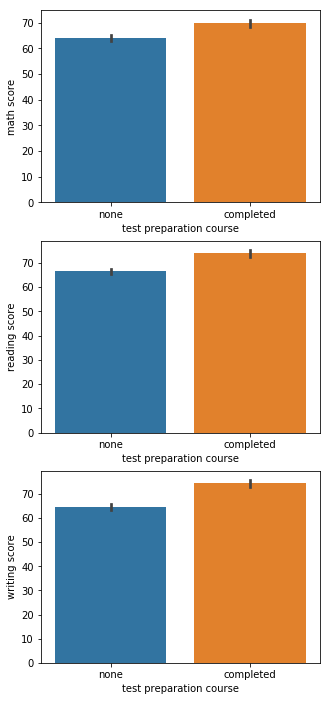

In [47]:
# Aynı şekilde bir kategorik değişkenin sürekli değişkenler üzerindeki etkisini araştırmak istiyorsak
# t-testi ile aralarında ilişki olup olmadığı araştırılır.

prep=df["test preparation course"].unique()
group_prep=df.groupby("test preparation course")

for var in ["math score","reading score","writing score"]:
    comparison=pd.DataFrame(columns=["group_1","group_2","statistic","p_value"])
    print("{} için t testi".format(var), end='')
    for i in range(0,len(prep)):
        for j in range(i+1,len(prep)):
            ttest=stats.ttest_ind(df[df["test preparation course"]==prep[i]][var],
                                 df[df["test preparation course"]==prep[j]][var])
            group_1=prep[i]
            group_2=prep[j]
            statistic=ttest[0]
            p_value=ttest[1]
            
            comparison=comparison.append({"group_1":group_1,
                                         "group_2":group_2,
                                         "statistic":statistic,
                                         "p_value":p_value}, ignore_index=True)
    display(comparison) 
     
# p<0.05 ten küçükse HA alternatifi kabul edilip iki değişken arasında ilişki yoktur denilebilir.
# ttesti negatif olduğu için negatif bir etki yapmıştır denilebilir.

plt.figure(figsize=(5,12))
plt.subplot(3,1,1)
sns.barplot(df["test preparation course"],df["math score"])

plt.subplot(3,1,2)
sns.barplot(df["test preparation course"],df["reading score"])

plt.subplot(3,1,3)
sns.barplot(df["test preparation course"],df["writing score"])

# Soru 4:
Which lessons are most correlated with each other?

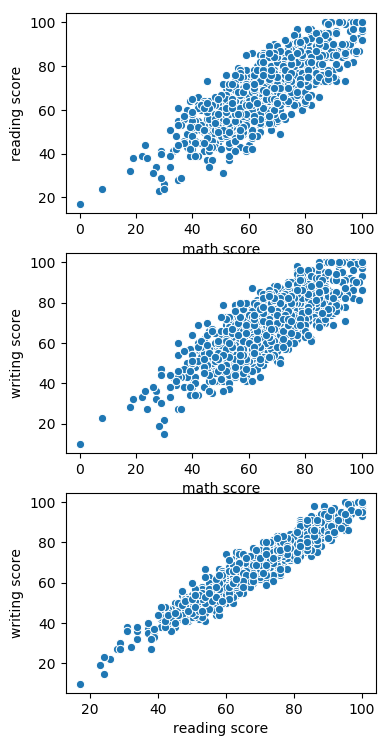

,math score,reading score,writing score
math score,1.000000000000000,0.817579663672053,0.802642045949807
reading score,0.817579663672053,1.000000000000000,0.954598077146248
writing score,0.802642045949807,0.954598077146248,1.000000000000000


In [55]:
# Sürekli değişkenler arasındaki ilişkiyi incelemek için görselleştirme tekniklerinden scatter plot, istatistiksel analiz için de 
# korelasyon katsayısından faydalanılır.

plt.figure(figsize=(4,9), dpi=100)
plt.subplot(3,1,1)
sns.scatterplot(df["math score"], df["reading score"])

plt.subplot(3,1,2)
sns.scatterplot(df["math score"], df["writing score"])

plt.subplot(3,1,3)
sns.scatterplot(df["reading score"], df["writing score"])

plt.show()

# scatterplot tan da anlaşıldığı gibi derslerin birbiriyle arasında 
# doğrusal ilişki vardır; ancak en çok ilişki okuma ve yazma arasındadır.
# Bunu kanıtlamak için bir de korelasyon analizi uygulayalım:

df.corr()
# korelasyon analizinden de anlaşıldığı gibi 1'e en yakın değer reading & writing(0.954)
# arasında olduğu için en fazla ilişki bu dersler arasındadır diyebiliriz.